Number of rows in the dataset without duplicates: 7919
1 times repeated: 6912 movies
2 times repeated: 384 movies
3 times repeated: 66 movies
4 times repeated: 9 movies
5 times repeated: 1 movies

Predicted vs Actual Ratings for every movie in the dataset (without duplicates):
                                    Name  Rating  Predicted Rating
0     #Gadhvi (He thought he was Gandhi)     7.0             6.890
1                                #Yaaram     4.4             4.767
2                   ...Aur Pyaar Ho Gaya     4.7             5.357
3                              ...Yahaan     7.4             6.939
4                     ?: A Question Mark     5.6             5.817
...                                  ...     ...               ...
7914                     Zulm Ki Hukumat     5.3             6.019
7915                     Zulm Ki Zanjeer     5.8             5.460
7916                 Zulm Ko Jala Doonga     4.6             5.358
7917                               Zulmi     4.5    

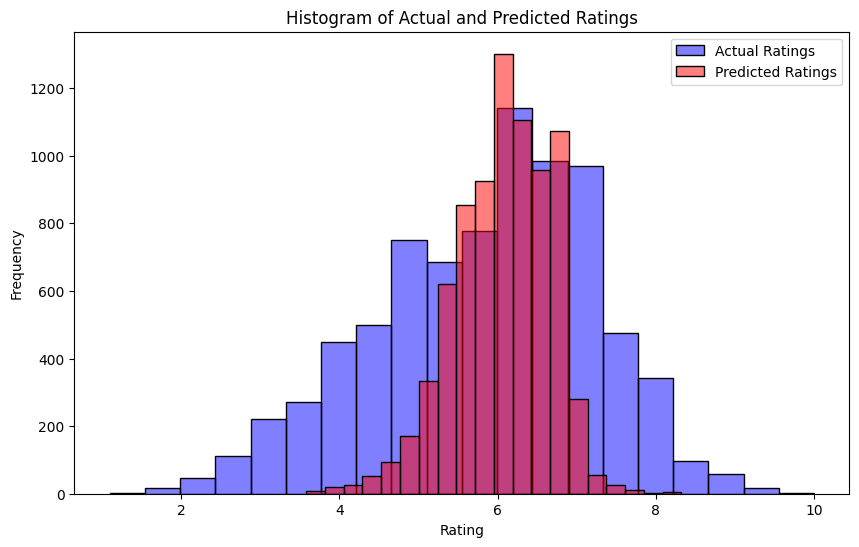

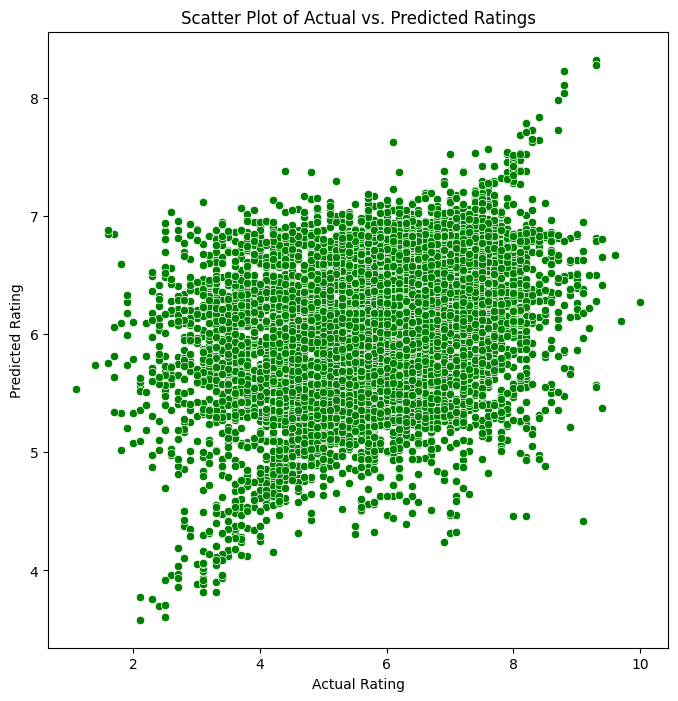

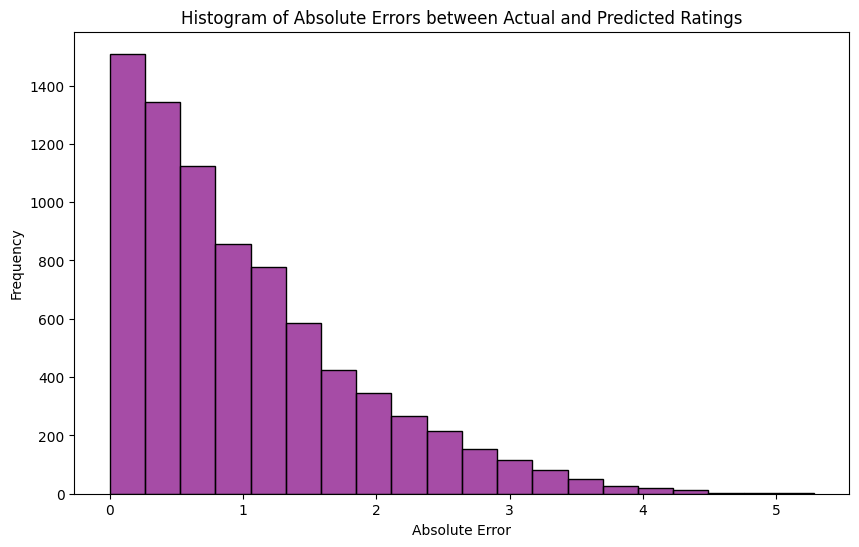

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset with specified encoding
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')

# Drop rows with missing ratings
df = df.dropna(subset=['Rating'])

# Handle missing values for other columns
df.fillna(method='ffill', inplace=True)

# Parse the 'Duration' column to extract numerical values in minutes
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

# Combine actor columns into a single column to simplify one-hot encoding
df['actors'] = df[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Drop the original actor columns
df = df.drop(columns=['Actor 1', 'Actor 2', 'Actor 3'])

# Encode categorical variables using One-hot encoding
df = pd.get_dummies(df, columns=['Genre', 'Director', 'actors'], drop_first=True)

# Remove duplicate rows
df_without_duplicates = df.drop_duplicates()

# Print the number of rows in the dataset without duplicates
print("Number of rows in the dataset without duplicates:", df_without_duplicates.shape[0])

# Count the number of occurrences of each unique value in the 'Name' column
name_value_counts = df['Name'].value_counts()

# Count the occurrences of each count of repetitions
repetition_counts = name_value_counts.value_counts()

# Print the counts of repetitions
for count, freq in repetition_counts.items():
    print(f"{count} times repeated: {freq} movies")

# Initialize the model (using RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Subset of Data: Using a smaller subset for initial testing
# Adjust the subset size based on your computational resources and testing needs
subset_size = min(len(X), 1000)
X_subset, y_subset = X.iloc[:subset_size], y.iloc[:subset_size]

# Train the model on the subset of data
model.fit(X_subset, y_subset)

# Show the predicted ratings for every movie in the dataset
predicted_ratings = pd.DataFrame({'Name': df['Name'], 'Predicted Rating': model.predict(X)})

# Remove duplicates
predicted_ratings = predicted_ratings.drop_duplicates(subset=['Name'])

# Show the predicted ratings alongside actual ratings
merged_df = pd.merge(df[['Name', 'Rating']], predicted_ratings, on='Name', how='inner')
print("\nPredicted vs Actual Ratings for every movie in the dataset (without duplicates):")
print(merged_df)

# Visualization 1: Histogram of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Rating', bins=20, color='blue', alpha=0.5, label='Actual Ratings')
sns.histplot(data=merged_df, x='Predicted Rating', bins=20, color='red', alpha=0.5, label='Predicted Ratings')
plt.title('Histogram of Actual and Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualization 2: Scatter Plot of Actual vs. Predicted Ratings
plt.figure(figsize=(8, 8))
sns.scatterplot(data=merged_df, x='Rating', y='Predicted Rating', color='green')
plt.title('Scatter Plot of Actual vs. Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()


# Visualization 5: Error Plot
merged_df['Absolute Error'] = abs(merged_df['Rating'] - merged_df['Predicted Rating'])
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Absolute Error', bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Absolute Errors between Actual and Predicted Ratings')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()
